We will be using Random Forest in our Model Creation due to the presence of outliers. Random Forest is robust towards outliers. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/creditcard.csv')

Feature Selection

In [2]:
# Based on feature importance analyzed in data file
df_imp = df[['V17', 'V12', 'V14', 'V10', 'V16', 'V11', 'V9', 'V7', 'V18', 'V4', 'Class']]

In [3]:
df_imp.describe()

,V17,V12,V14,V10,V16,V11,V9,V7,V18,V4,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-6.425436e-13,1.053347e-12,-1.474791e-13,7.092545e-13,-2.282250e-13,1.874948e-12,-1.179749e-12,-3.054600e-13,4.950748e-13,8.321385e-13,0.001727
std,8.493371e-01,9.992014e-01,9.585956e-01,1.088850e+00,8.762529e-01,1.020713e+00,1.098632e+00,1.237094e+00,8.381762e-01,1.415869e+00,0.041527
min,-2.516280e+01,-1.868371e+01,-1.921433e+01,-2.458826e+01,-1.412985e+01,-4.797473e+00,-1.343407e+01,-4.355724e+01,-9.498746e+00,-5.683171e+00,0.000000
25%,-4.837483e-01,-4.055715e-01,-4.255740e-01,-5.354257e-01,-4.680368e-01,-7.624942e-01,-6.430976e-01,-5.540759e-01,-4.988498e-01,-8.486401e-01,0.000000
50%,-6.567575e-02,1.400326e-01,5.060132e-02,-9.291738e-02,6.641332e-02,-3.275735e-02,-5.142873e-02,4.010308e-02,-3.636312e-03,-1.984653e-02,0.000000
75%,3.996750e-01,6.182380e-01,4.931498e-01,4.539234e-01,5.232963e-01,7.395934e-01,5.971390e-01,5.704361e-01,5.008067e-01,7.433413e-01,0.000000
max,9.253526e+00,7.848392e+00,1.052677e+01,2.374514e+01,1.731511e+01,1.201891e+01,1.559499e+01,1.205895e+02,5.041069e+00,1.687534e+01,1.000000


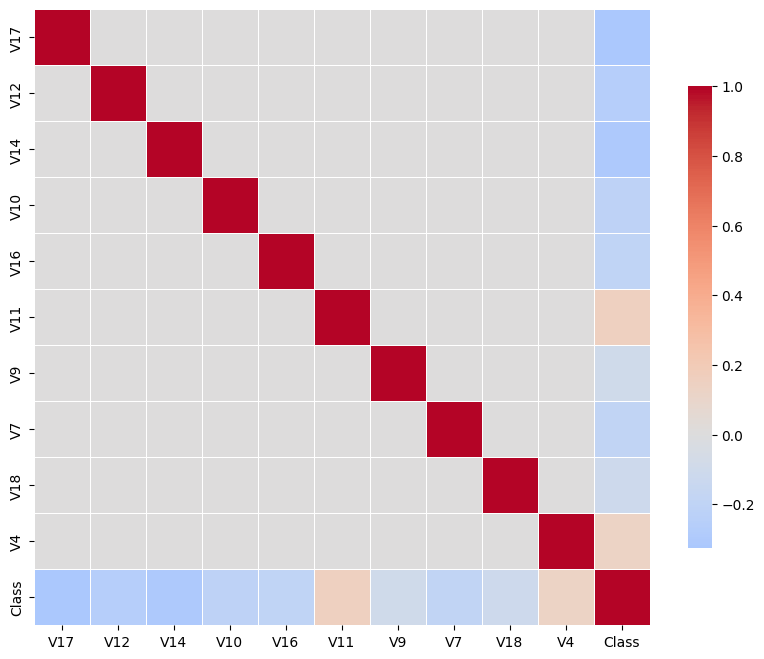

In [4]:
# correlation
import matplotlib.pyplot as plt
import seaborn as sns

matrix = df_imp.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (width, height)
sns.heatmap(matrix, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.show()

### Model Creation

Scaling data

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_imp), columns=df_imp.columns)

print(df_normalized)

             V17       V12       V14       V10       V16       V11        V9  \
0       0.737173  0.680908  0.635591  0.510600  0.434392  0.252484  0.475312   
1       0.727794  0.744342  0.641219  0.505267  0.464105  0.381188  0.453981   
2       0.763381  0.706683  0.640473  0.513018  0.357443  0.322422  0.410603   
3       0.711253  0.710910  0.636372  0.507585  0.415653  0.271817  0.414999   
4       0.724243  0.724477  0.608406  0.524303  0.434995  0.236355  0.490950   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.789000  0.806406  0.801627  0.598850  0.484577  0.190550  0.528729   
284803  0.730383  0.738709  0.623352  0.488530  0.426717  0.276355  0.482925   
284804  0.740239  0.706572  0.628885  0.498692  0.453827  0.309763  0.477677   
284805  0.745946  0.667901  0.661171  0.500464  0.429998  0.170288  0.476287   
284806  0.711942  0.703005  0.643218  0.489782  0.439728  0.223414  0.479528   

              V7       V18        V4  C

In [9]:
df_normalized.describe()

,V17,V12,V14,V10,V16,V11,V9,V7,V18,V4,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.731130,0.704193,0.646053,0.508722,0.449352,0.285286,0.462780,0.265356,0.653292,0.251930,0.001727
std,0.024678,0.037660,0.032231,0.022528,0.027866,0.060698,0.037846,0.007537,0.057647,0.062764,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.717074,0.688907,0.631744,0.497644,0.434468,0.239943,0.440626,0.261980,0.618983,0.214311,0.000000
50%,0.729221,0.709471,0.647755,0.506800,0.451464,0.283338,0.461008,0.265600,0.653042,0.251050,0.000000
75%,0.742743,0.727494,0.662635,0.518113,0.465994,0.329266,0.483350,0.268831,0.687736,0.284882,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X = df_normalized.drop('Class', axis=1)
y = df_normalized['Class']

Data Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dealing with Imbalanced data

In [12]:
from imblearn.combine import SMOTETomek

# Create a SMOTE-Tomek Links object
smt = SMOTETomek(sampling_strategy='auto')

# Fit and resample the data
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [13]:
y_resampled.value_counts()

Class
0.0    227451
1.0    227451
Name: count, dtype: int64

Random Forest model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
oob_scores = []

clf = RandomForestClassifier(oob_score=True)
for _ in range(10):
    # Sample 5000 records with replacement using scikit-learn's resample
    X_train, y_train = resample(X_resampled, y_resampled, replace=True, n_samples=5000)

    # Train the classifier on the sampled data
    clf.fit(X_train, y_train)

    # Append the OOB score
    oob_scores.append(clf.oob_score_)

print(f"OOB Score for 5 runs with 5000 samples each is {np.mean(oob_scores)}")

OOB Score for 5 runs with 5000 samples each is 0.9793799999999999


Training and Evaluating Model

In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"acc: {acc:.4f}")

f1_score = f1_score(y_test, y_pred)
print(f"f1_score: {f1_score:.4f}")

recall_score = recall_score(y_test, y_pred)
print(f"recall score: {recall_score:.4f}")

precision_score = precision_score(y_test, y_pred)
print(f"precision score: {precision_score:.4f}")

acc: 0.9993
f1_score: 0.8137
recall score: 0.8469
precision score: 0.7830


### Creating Pickle File

In [21]:
import os
import pickle

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
model_dir = os.path.join(parent_dir, 'models')

with open(os.path.join(model_dir, 'model.pkl'), 'wb') as f:
    pickle.dump(clf, f)